In [1]:
import cv2
import numpy as np
import os
import glob

In [11]:
from google.colab.patches import cv2_imshow

In [12]:
CHECKERBOARD = (7, 10)

In [3]:
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [4]:
threedpoints = []
twodpoints = []
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

In [9]:
images = glob.glob('*.jpg')

In [10]:
for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)

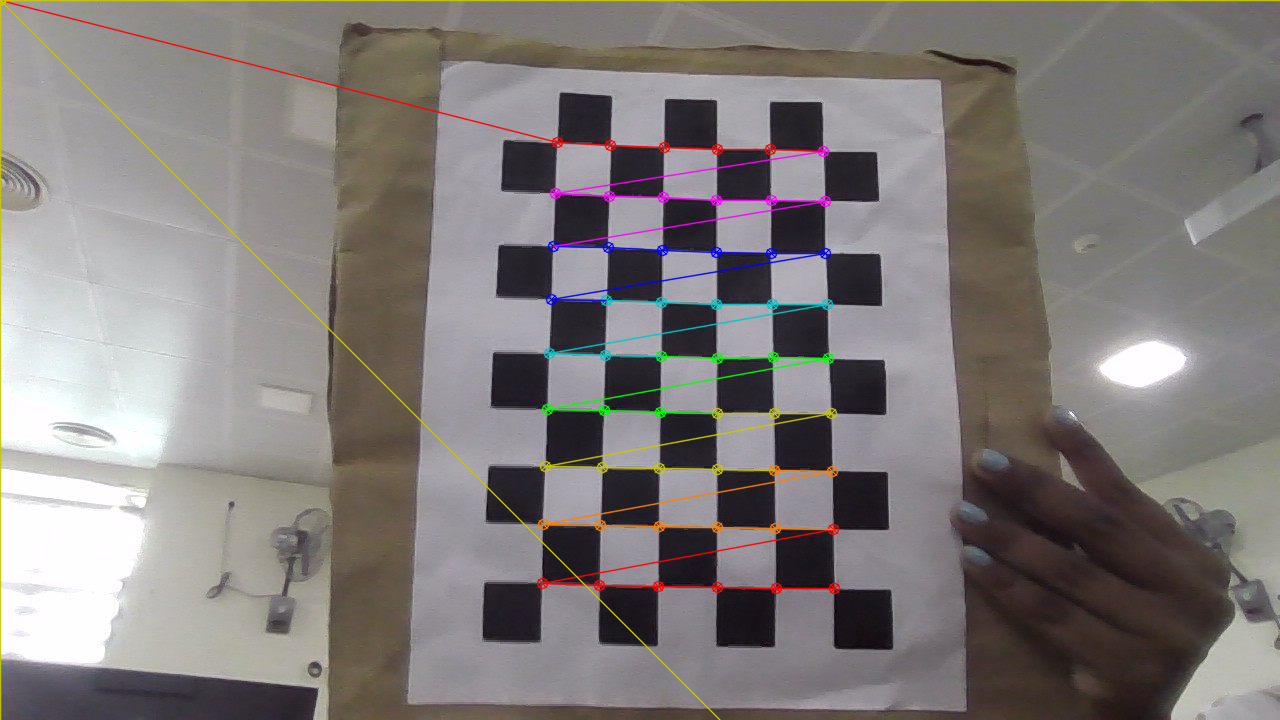

In [17]:
if ret == True:
        threedpoints.append(objectp3d)
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)
        twodpoints.append(corners2)
        image = cv2.drawChessboardCorners(image,
                                          CHECKERBOARD,
                                          corners2, ret)
cv2_imshow(image)

In [18]:
h, w = image.shape[:2]

ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None)

print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

 Camera matrix:
[[1.72568850e+03 0.00000000e+00 8.28792051e+02]
 [0.00000000e+00 1.92101988e+03 2.99194086e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient:
[[ 6.61874798e-01 -1.22731934e+01 -5.76011170e-02  2.77936752e-02
   5.38868478e+01]]

 Rotation Vectors:
(array([[ 0.1101577 ],
       [-0.81004497],
       [-3.04163924]]),)
